# Traffic Sign Detection and Recognition Model


Group 16: 

Ravi kanu baniya

Chandrali Shyam

Roshan Yadav

Sukanya Baruah

# Importing Required Libraries

In [1]:
 import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout




#  Storing data, labels in the list

In [2]:
data = []
labels = []
# We have 43 Classes
classes = 43
cur_path = os.getcwd()

In [3]:
cur_path

'C:\\Users\\KIIT\\OneDrive\\Desktop\\TTL_MINI_PROJECT'

# Preprocessing all those traffic sign images

In [4]:
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

# Converting lists into numpy arrays

In [5]:
data = np.array(data)
labels = np.array(labels)

# Saving labels & Data for future use

In [6]:

np.save('./training/data',data)
np.save('./training/target',labels)

# Load data & Labels

In [7]:
data=np.load('./training/data.npy')
labels=np.load('./training/target.npy')

In [8]:
data.shape

(39209, 30, 30, 3)

In [9]:
labels.shape

(39209,)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)


In [11]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


# Converting labels to onehot encoding

In [12]:
#onehot encoding is the method of converting the categorical data column into new categorical column for better performance and prediction
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

# Model Building

In [13]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
# We have 43 classes that's why we have defined 43 in the dense
model.add(Dense(43, activation='softmax'))

# Compilation of Model

In [14]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
epochs = 30
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/30
981/981 [==============================] - 97s 98ms/step - loss: 1.7315 - accuracy: 0.5738 - val_loss: 0.2911 - val_accuracy: 0.9317
Epoch 2/30
981/981 [==============================] - 90s 92ms/step - loss: 0.4730 - accuracy: 0.8707 - val_loss: 0.1270 - val_accuracy: 0.9680
Epoch 3/30
981/981 [==============================] - 99s 101ms/step - loss: 0.3129 - accuracy: 0.9127 - val_loss: 0.0724 - val_accuracy: 0.9810
Epoch 4/30
981/981 [==============================] - 169s 172ms/step - loss: 0.2465 - accuracy: 0.9323 - val_loss: 0.0768 - val_accuracy: 0.9802
Epoch 5/30
981/981 [==============================] - 72s 73ms/step - loss: 0.2382 - accuracy: 0.9379 - val_loss: 0.0784 - val_accuracy: 0.9773
Epoch 6/30
981/981 [==============================] - 64s 66ms/step - loss: 0.2299 - accuracy: 0.9425 - val_loss: 0.0652 - val_accuracy: 0.9823
Epoch 7/30
981/981 [==============================] - 65s 67ms/step - loss: 0.2509 - accuracy: 0.9382 - val_loss: 0.0910 - val_accura

# Plotting a graph against accuracy and epochs 

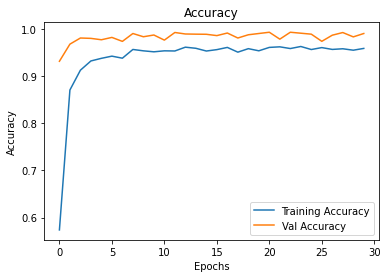

In [16]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [17]:
#here we can see after 5 epoch we started getting flat constant graph
#let plot a graph against the loss against each epochs

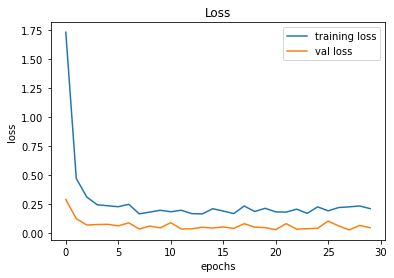

In [18]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Testing on Test data 

In [19]:
y_test = pd.read_csv('Test.csv')
label = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]
for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
X_test=np.array(data)


In [23]:
Y_pred = model.predict(X_test)
Y_pred_classes = Y_pred.argmax(axis=-1)
Y_pred_classes

395/395 [==============================] - 6s 16ms/step


array([16,  1, 38, ...,  3,  7, 10], dtype=int64)

# Checking for Accuracy Score

In [25]:
from sklearn.metrics import accuracy_score

# Convert predicted probabilities to class labels
Y_pred_classes = Y_pred.argmax(axis=-1)

# Compute accuracy
accuracy = accuracy_score(label, Y_pred_classes)
print("Accuracy:", accuracy)

Accuracy: 0.9547901821060966


# Saving Our Model

In [26]:
model.save("./training/TSR.h5")

In [35]:
from keras.models import load_model
model = load_model('./training/TSR.h5')


# Classes of Traffic Signs(Total 43 classes)

In [28]:
# Classes of trafic signs
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [29]:
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = model.predict(X_test)
    return image,Y_pred

# Testing one image for traffic sign detection and recognition manually 

1/1 [==============================] - 0s 40ms/step
Predicted Traffic Sign is: Road work


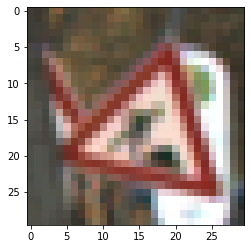

In [34]:
plot, prediction = test_on_img(r'C:\Users\KIIT\OneDrive\Desktop\TTL_MINI_PROJECT\Test\00045.png')
a = np.argmax(prediction)
print("Predicted Traffic Sign is:", classes[a])
plt.imshow(plot)



Hence, Our Model is ready for Traffic Sign Detection and Recognition With 95.47 % accuracy.